In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.shape

(8124, 23)

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mushroom.isna()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

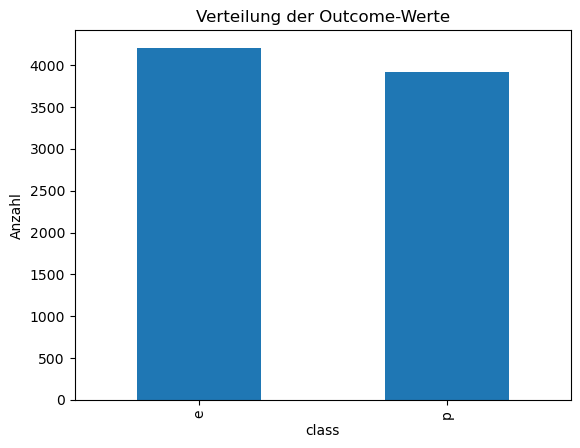

In [8]:
mushroom['class'].value_counts().plot.bar()
plt.title('Verteilung der Outcome-Werte')
plt.xlabel('class')
plt.ylabel('Anzahl')
plt.show()

In [9]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Ja, es gibt eine einfachere Möglichkeit, die One-Hot-kodierten Features in ein DataFrame zu konvertieren, indem man die get_dummies-Funktion von Pandas verwendet. Diese Funktion wandelt eine Spalte mit kategorischen Werten in mehrere Spalten um, wobei jede Spalte eine binäre Kodierung des kategorischen Werts darstellt.

In diesem Beispiel werden alle Spalten von X in One-Hot-kodierte Spalten umgewandelt und mit dem Trennzeichen _ als Präfix versehen. Die so erzeugten Spalten werden dann mit der Zielvariable y in einem neuen DataFrame df zusammengeführt.

In [17]:
# Wähle die Features und die Zielvariable aus
X = mushroom.drop('class', axis=1)
y = mushroom['class']

# One-Hot-Kodierung der Features
X_encoded = pd.get_dummies(X, prefix_sep='_')

# Zusammenführen der Features und Zielvariable in einem DataFrame
df = pd.concat([X_encoded, y], axis=1)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the features and the target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Categorical Naive Bayes model
nb = CategoricalNB()

# Train the model on the training data
nb.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = nb.score(X_test, y_test)

# Vorhersage auf den Testdaten
y_pred = nb.predict(X_test)

# Berechnung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")

# Erstellung einer Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(f"Konfusionsmatrix:\n{cm}")

Genauigkeit: 0.936
Konfusionsmatrix:
[[827  16]
 [ 88 694]]


Vergleich mit dem Gausschen Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the features and the target variable
X = df.drop('class', axis=1)
y = df['class']

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training des Naive Bayes Modells
nb = GaussianNB()
nb.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = nb.predict(X_test)

# Berechnung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")

# Erstellung einer Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(f"Konfusionsmatrix:\n{cm}")

Genauigkeit: 0.9643150123051681
Konfusionsmatrix:
[[1171   86]
 [   1 1180]]


Er sollte eigentlich nicht besser abschneiden, aber hier scheint das Merkmal der Normalverteilung gegeben zu sein

In diesem Fall scheinen die kontinuierlichen Merkmale normalverteilt zu sein
